# WHO DATA for year 2022

We implemented, the paper's analysis with our addition, for the data of the countries in the year 2022.


In [1]:
%%capture
%run setup.ipynb
%run PR5_gitlab.ipynb

## Code description

The following code is used to filter and clean the COVID-19 case data for analysis. The first line uses the `isin()` method to filter the data to only include cases reported on January 1st, 2022 and December 5th, 2022. The resulting data is then stored in a new DataFrame called 'gt'.

Next, the `diff()` function is used to calculate the number of cases and deaths in the period between the two dates. 

The next line creates a new DataFrame 'wo' which contains only the December 5th, 2022 data by filtering the 'gt' DataFrame for the corresponding date. 

The following line drops the 'Country_code', 'New_cases' and 'New_deaths' columns from the 'wo' DataFrame as they are not needed for the analysis. 

Finally it calculate the cases per capita and death per capita by dividing the 'Period_cases' and 'Period_deaths' by 'Population' and multiplying by 100,000.




In [2]:
gt=clean[clean['Date_reported'].isin(['2022-01-01','2022-12-05'])]
gt=pd.DataFrame(gt)
dc= gt['Cumulative_cases'].diff(1)
dd= gt['Cumulative_deaths'].diff(1)
gt['Period_deaths']=dd
gt['Period_cases']=dc
wo=gt[gt['Date_reported']=='2022-12-05']
wo=pd.DataFrame(wo)
wo=wo.drop(columns=['Country_code','New_cases','New_deaths'], axis=1)
wo['Population']=wo['Population'].astype(int)
wo['Cases_per_Capita']=(wo['Period_cases'].div(wo['Population']))*100000
wo['Death_per_Capita']=(wo['Period_deaths'].div(wo['Population']))*100000
print(wo.shape)
wo.head()

(172, 10)


,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
1067,2022-12-05,Afghanistan,EMRO,206236,7834,38041754,478.0,48177.0,126.642426,1.256514
2135,2022-12-05,Albania,EURO,332294,3594,2854191,377.0,122070.0,4276.868647,13.208647
3203,2022-12-05,Algeria,AFRO,271100,6881,43053054,605.0,52668.0,122.332785,1.405243
4271,2022-12-05,Andorra,EURO,47219,157,77142,17.0,23479.0,30436.078919,22.037282
5339,2022-12-05,Angola,AFRO,104750,1925,31825295,168.0,27963.0,87.864072,0.527882


In [3]:
dg.to_csv(f'{RESULTS_PATH}/data_2022.csv')

### Analyzing  Data
We created a scatter plot using the seaborn library (sns) to show the relationship between cases per capita and death per capita for different WHO regions. The x-axis represents the cases per capita and the y-axis represents the death per capita.

The code below calls two functions, `corr2()` and `SSE_plot()`, to perform additional analysis on the cleaned COVID-19 case data stored in the 'wo' DataFrame.

The `corr2()` function calculates the correlation between all pairs of columns in the 'wo' DataFrame, and the name of the correlation matrix is passed as the first argument.

The `SSE_plot()` function creates a plot of the sum of squared errors for different numbers of clusters for k-means clustering, using the 'Cases_per_Capita' and 'Death_per_Capita' columns from the 'wo' DataFrame as the variables to be clustered, the third argument is the name of the plot. Using this graph is it possible to choose a more efficient parameter k for the number of cluster by looking at the flattering of the function.


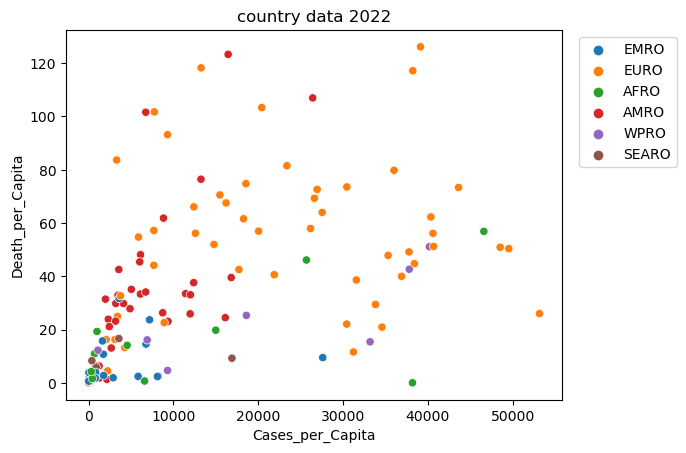

In [4]:
sns.scatterplot(x = wo['Cases_per_Capita'], y = wo['Death_per_Capita'], data=wo, hue='WHO_region')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('country data 2022')
plt.savefig('../Figures/data_2022_1',dpi=300)

,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
Cumulative_cases,1.000000,0.894254,0.434493,0.933766,0.931189,0.145608,0.210323
Cumulative_deaths,0.894254,1.000000,0.426227,0.920551,0.721865,-0.007384,0.171616
Population,0.434493,0.426227,1.000000,0.345410,0.325626,-0.125649,-0.101147
Period_deaths,0.933766,0.920551,0.345410,1.000000,0.831798,0.064634,0.243402
Period_cases,0.931189,0.721865,0.325626,0.831798,1.000000,0.253928,0.243850
Cases_per_Capita,0.145608,-0.007384,-0.125649,0.064634,0.253928,1.000000,0.586519
Death_per_Capita,0.210323,0.171616,-0.101147,0.243402,0.243850,0.586519,1.000000


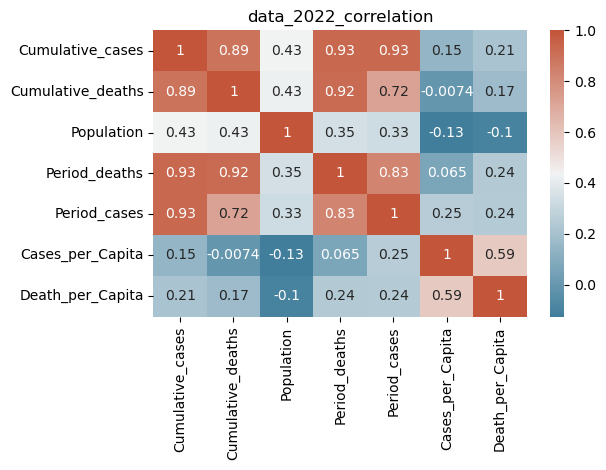

In [5]:
corr2(wo,'data_2022_correlation')

In [ ]:
SSE_plot(wo,'Cases_per_Capita','Death_per_Capita','L_bar_data_2022')

### Clustering Analysis

The code calls two functions, `k_means()` and `tree()`, to perform cluster analysis on the cleaned COVID-19 case data stored in the 'wo' DataFrame.

The `k_means()` function performs k-means clustering on the 'Cases_per_Capita' and 'Death_per_Capita' columns of the 'wo' DataFrame, using 4 clusters, number decided by looking at the SSE plot, this is  a higher number respect to the previous analysis on South East Asia.

The `tree()` function performs hierarchical clustering on the 'wo' DataFrame, using the linkage method, a method of grouping similar data points into clusters by building a hierarchy of clusters. 



In [ ]:
k_means(4,wo,'Cases_per_Capita','Death_per_Capita','K_means_2022')

In [ ]:
tree(wo,23,25,18,'hierarchical_data_2022')

### World Map

Finally using  the folium library to create an interactive map of the world, with markers indicating the location of each country and its information. The map is created using the 'openstreetmap' tiles.

It then uses a for loop to add a circle marker to the map for each country's latitude and longitude and its information.

Then it creates a MarkerCluster object and adds it to the map, and another for loop is used to add markers to the cluster for each country's latitude, longitude and its information(country name, Covid-cumulative cases, Covid-cumulative deaths and population).

Finally, it adds the marker cluster to the map and display the map.


In [ ]:
C22=merge2[merge2['Date_reported']=='2022-12-05']

In [ ]:
map_world(C22, 'data_World_2022')